## **Exploratory Data Analysis**

The data represents information about bank customers and includes the following columns:

* idade = age of the customer
* sexo = gender (F or M)
* dependentes = number of dependents
* escolaridade = education level
* salario_anual = salary range
* tipo_cartao = type of card held by the customer
* qtd_produtos = number of products purchased in the last 12 months
* iteracoes_12m = number of interactions/transactions in the last 12 months
* meses_inativo_12m =  number of months the customer was inactive
* limite_credito = credit limit of the customer
* valor_transacoes_12m = value of transactions in the last 12 months
* qtd_transacoes_12m = number of transactions in the last 12 months

The analysis was performed at **MySQL** with the data available at:  
https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

**Purpose:** evaluate the number of transactions and quantity of products purchased according the type of card, education level and salary range of customer.


**Dashboard**

https://lookerstudio.google.com/reporting/d570e1f4-8a99-4146-aeac-8a940a777789

*Made at LookerStudio*


### **Initial exploration**


**Number of rows**

```sql
select
	count(*)
from credito;
```

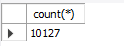

**Type of data**

```sql
describe credito;
```

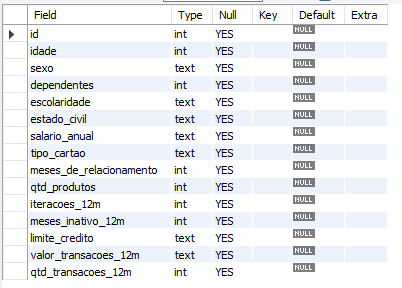

**Counting null values**

```sql
SELECT
    COUNT(CASE WHEN idade IS NULL THEN 1 END) AS idade_null,
    COUNT(CASE WHEN sexo IS NULL THEN 1 END) AS sexo_null,
    COUNT(CASE WHEN dependentes IS NULL THEN 1 END) AS dependentes_null,
    COUNT(CASE WHEN qtd_produtos IS NULL THEN 1 END) AS qtd_produtos_null,
    COUNT(CASE WHEN salario_anual IS NULL THEN 1 END) AS salario_null,
    COUNT(CASE WHEN iteracoes_12m IS NULL THEN 1 END) AS iteracoes_12m_null,
    COUNT(CASE WHEN meses_de_relacionamento IS NULL THEN 1 END) AS meses_relacionamento_null,
    COUNT(CASE WHEN meses_inativo_12m IS NULL THEN 1 END) AS meses_inativo_12m_null,
    COUNT(CASE WHEN limite_credito IS NULL THEN 1 END) AS limite_credito_null,
    COUNT(CASE WHEN valor_transacoes_12m IS NULL THEN 1 END) AS valor_transacoes_12m_null,
    COUNT(CASE WHEN qtd_transacoes_12m IS NULL THEN 1 END) AS qtd_transacoes_12m_null
FROM credito;

```

There are no null values ​​in this table

**Evaluating category variables**

```sql
select
	sexo,
	count(sexo)
from credito
group by(sexo);

select
	escolaridade,
	count(escolaridade)
from credito
group by(escolaridade);

select
	salario_anual,
	count(salario_anual)
from credito
group by(salario_anual);

select
	tipo_cartao,
	count(tipo_cartao)
from credito
group by(tipo_cartao);

select
	estado_civil,
	count(estado_civil)
from credito
group by(estado_civil);

```

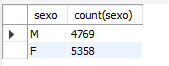

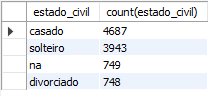

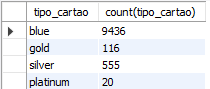

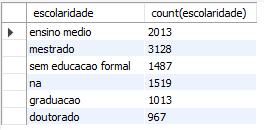

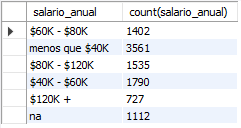

**Evaluating numeric variables**

```sql
	WITH metricas as (
	SELECT
			MIN(idade) AS min_idade,
			MAX(idade) AS max_idade,
			AVG(idade) AS avg_idade,
			STDDEV(idade) AS stdev_idade,

			MIN(dependentes) AS min_dependentes,
			MAX(dependentes) AS max_dependentes,
			AVG(dependentes) AS avg_dependentes,
			STDDEV(dependentes) AS stdev_dependentes,

			MIN(meses_de_relacionamento) AS min_meses_rel,
			MAX(meses_de_relacionamento) AS max_meses_rel,
			AVG(meses_de_relacionamento) AS avg_meses_rel,
			STDDEV(meses_de_relacionamento) AS stdev_meses_rel,

			MIN(qtd_produtos) AS min_qtd_produtos,
			MAX(qtd_produtos) AS max_qtd_produtos,
			AVG(qtd_produtos) AS avg_qtd_produtos,
			STDDEV(qtd_produtos) AS stdev_qtd_produtos,

			MIN(iteracoes_12m) AS min_iteracoes_12m,
			MAX(iteracoes_12m) AS max_iteracoes_12m,
			AVG(iteracoes_12m) AS avg_iteracoes_12m,
			STDDEV(iteracoes_12m) AS stdev_iteracoes_12m,

			MIN(meses_inativo_12m) AS min_meses_inativo_12m,
			MAX(meses_inativo_12m) AS max_meses_inativo_12m,
			AVG(meses_inativo_12m) AS avg_meses_inativo_12m,
			STDDEV(meses_inativo_12m) AS stdev_meses_inativo_12m,

			MIN(limite_credito) AS min_limite_credito,
			MAX(limite_credito) AS max_limite_credito,
			AVG(limite_credito) AS avg_limite_credito,
			STDDEV(limite_credito) AS stdev_limite_credito,

			MIN(valor_transacoes_12m) AS min_valor_transacoes_12m,
			MAX(valor_transacoes_12m) AS max_valor_transacoes_12m,
			AVG(valor_transacoes_12m) AS avg_valor_transacoes_12m,
			STDDEV(valor_transacoes_12m) AS stdev_valor_transacoes_12m,

			MIN(qtd_transacoes_12m) AS min_qtd_transacoes_12m,
			MAX(qtd_transacoes_12m) AS max_qtd_transacoes_12m,
			AVG(qtd_transacoes_12m) AS avg_qtd_transacoes_12m,
			STDDEV(qtd_transacoes_12m) AS stdev_qtd_transacoes_12m
		FROM
			credito
)
SELECT * FROM metricas;

```

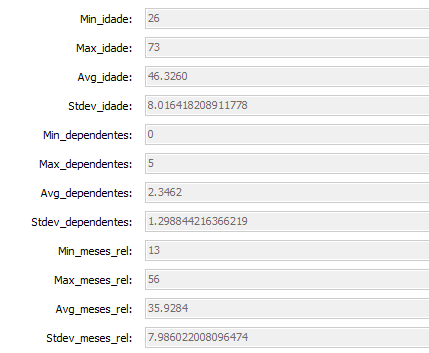

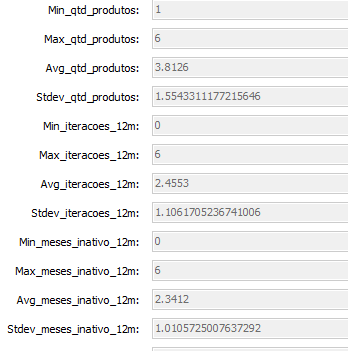

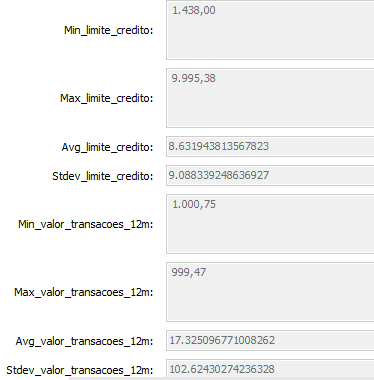

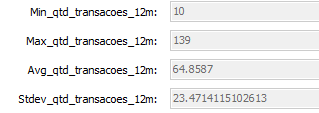

### Data Analysis

**Gender pay gap**

```sql
SELECT
    COUNT(salario_anual) AS total_salario_anual,
    sexo,
    escolaridade,
    salario_anual
FROM credito
where salario_anual != 'na' and escolaridade != 'na'
GROUP BY sexo, salario_anual, escolaridade
order by salario_anual;
```

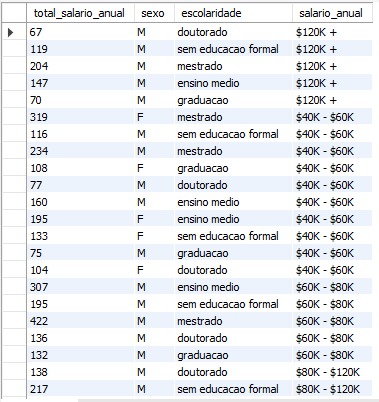

Men concentrate the highest annual salaries (above USD 120k), while the salary range for women is less than USD 60k. Even with lower education levels, men have higher salaries than women with advanced degrees such as PhDs and master's degrees.

**Variation in the total number of months in relationship and months inactive by age**

```sql
select
	idade,
    avg(meses_de_relacionamento) as meses_de_rel_avg,
    avg(meses_inativo_12m) as meses_inativo_avg
from credito
group by idade
order by idade desc;
```



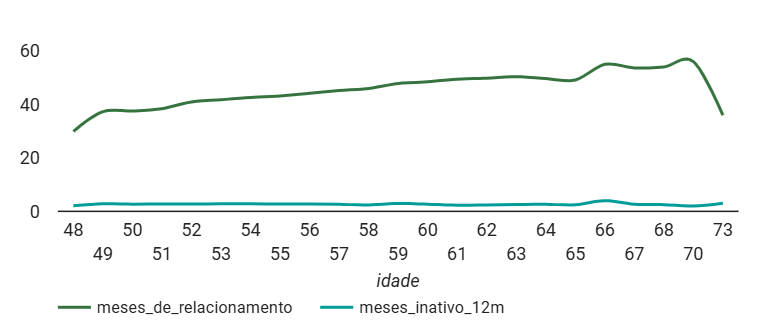

As expected, with increasing age, there is an increase in the time the card is used. However, there is a significant drop in usage time at age 73. The longest period the card was inactive was 6 months, among customers aged 65 to 67.

**Number of transactions and products purchased**

```sql
select
	salario_anual,
    tipo_cartao,
    sexo,
    estado_civil,
    avg(qtd_produtos) as avg_qtd_prod,
    avg(qtd_transacoes_12m) as avg_qtd_trans
from credito
where salario_anual != 'na' and estado_civil != 'na'
group by salario_anual, tipo_cartao, sexo, estado_civil
order by avg_qtd_trans desc;
```

*Part of extracted table*

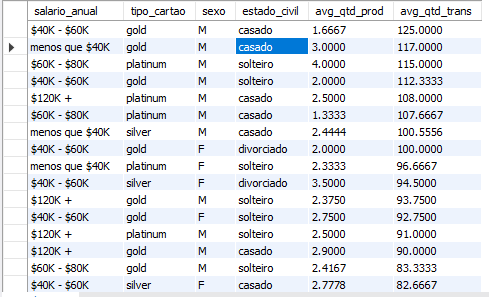

* Married male customers are the ones who make the most transactions with the card. However, the average number of products purchased per year is only 1.667. On the other hand, single men have a higher average of products purchased. The number of transactions varies considerably.
* Men who earn up to $80K are the largest users of the card. The Gold and Platinum cards have the highest number of transactions. However, other analyses show that the Blue card is the most used by customers.


### Other conclusions and recommendations

Based on these results, it is important to conduct a study to understand why:

1. Women who use this card have lower salary ranges and are the ones who use the cards the least. What strategies could be interesting to attract this audience?
2. Understand what makes the Gold and Platinum cards have the highest number of transactions and products purchased. What makes the Blue card more attractive than the others yet still underutilized?
3. What makes the cards more attractive to married men and customers who earn less than 40K? What can be done to attract other audiences?
4. The age range of customers is between 26 to 73 years, with a large majority of customers over 46 years old. What makes the card attractive to customers in this age group? What strategies can be used to attract a younger audience?
5. Why are up to 6 products purchased annually with these cards?